# Examining the Effect of Review Count and Location on Stars Earned by Businesses on Yelp

# Part One

## Introduction

Yelp is company that publishes Yelp.com, a website dedicated to crowd-sourced reviewes about businesses. Yelp has many key features
that help users consume products and services in the most effective way possible. The website and mobile application contains information
regarding location (street, city, state/province, country, latitude, longitude), opening and closing hours, services provided, number of
reviews, average reviews, business attributes (e.g. accepts credit cards), and taggable categories (e.g. resturant, health & medical, good for
kids, etc.).

In the first iteration of this project, I look to identify a statistical relationship between location and review count against number of stars (out of 5.0, with 5.0 being the best). More specifically, I examine businesses from Toronto (nominal categorical variables) and look to determine whether the number of reviews (discrete variable) has any preictive power when it comes to number of stars given to a business (ordinal categorical variable). This data exploration includes summary statistics, a stacked bar chart, a historgram, a set of boxplots, and two sets of maps.

In the second iteration of this project, I improve upon the data exploration of the first draft by fine-tuning the plots from the first iteration, including a draft of a data visualization stratifying the Yelp data by city wards, and adding three new maps. I conclude by discussing some limitations of this work and how future projects may use and improve upon this notebook.

### Research Question: In Toronto, does the location and number of reviews of a business on Yelp influence the number of stars it receives from users?

## Importing and Cleaning the Data

The following analysis utilizes four commonly known python packages: pandas (which is used to import and clean the data), matplotlib (which is used for formatting), pyplot (from matplotlib, which is used for plotting), and seaborn (which is used for plotting).

In [2]:
# import packages for analysis
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import itertools
import plotly
import plotly.offline as py # make offline 
import plotly.express as px
py.init_notebook_mode(connected=True)
# this will allow ploting inside the notebook

The Yelp data used in this project was sourced from Kaggle. According to their description, "This dataset is a subset of Yelp's businesses, reviews, and user data...put together for the Yelp Dataset Challenge." The data is stored as both CSV and JSON files, and can be found at the following link: https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6.

In [3]:
# reading in the data
yelp_business = pd.read_json("yelp_academic_dataset_business.json", lines = True)
yelp_business.head()

business_id                      name  \
0  f9NumwFMBDn751xgFiRbNA  The Range At Lake Norman   
1  Yzvjg0SayhoZgCljUJRF9Q         Carlos Santo, NMD   
2  XNoUzKckATkOD1hP6vghZg                   Felinus   
3  6OAZjbxqM5ol29BuHsil3w      Nevada House of Hose   
4  51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC   

                     address             city state postal_code   latitude  \
0            10913 Bailey Rd        Cornelius    NC       28031  35.462724   
1  8880 E Via Linda, Ste 107       Scottsdale    AZ       85258  33.569404   
2      3554 Rue Notre-Dame O         Montreal    QC     H4C 1P4  45.479984   
3             1015 Sharp Cir  North Las Vegas    NV       89030  36.219728   
4         4827 E Downing Cir             Mesa    AZ       85205  33.428065   

    longitude  stars  review_count  is_open  \
0  -80.852612    3.5            36        1   
1 -111.890264    5.0             4        1   
2  -73.580070    5.0             5        1   
3 -115.127725    2.5             3        0   
4 -111.726648    4.5            26        1   

                                          attributes  \
0  {'BusinessAcceptsCreditCards': 'True', 'BikePa...   
1  {'GoodForKids': 'True', 'ByAppointmentOnly': '...   
2                                               None   
3  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
4  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   

                                          categories  \
0  Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...   
1  Health & Medical, Fitness & Instruction, Yoga,...   
2                   Pets, Pet Services, Pet Groomers   
3  Hardware Stores, Home Services, Building Suppl...   
4  Home Services, Plumbing, Electricians, Handyma...   

                                               hours  
0  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...  
1                                               None  
2                                               None  
3  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...  
4  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...

Because I want to only look at certain variables in the dataset, I filter out some of them in the following code chunks. Namely, I want to keep a business' name, latitude, longitude, city, and state (Toronto data only), review count, and number of stars.

In [4]:
# removing unnecessary categories
# leaves city, state, latitude, longitude, stars, and review count only
yelp_business_cleaned = yelp_business[["name", "city", "state", "latitude", "longitude", "stars", "review_count"]]
yelp_business_cleaned.head()

name             city state   latitude   longitude  \
0  The Range At Lake Norman        Cornelius    NC  35.462724  -80.852612   
1         Carlos Santo, NMD       Scottsdale    AZ  33.569404 -111.890264   
2                   Felinus         Montreal    QC  45.479984  -73.580070   
3      Nevada House of Hose  North Las Vegas    NV  36.219728 -115.127725   
4   USE MY GUY SERVICES LLC             Mesa    AZ  33.428065 -111.726648   

   stars  review_count  
0    3.5            36  
1    5.0             4  
2    5.0             5  
3    2.5             3  
4    4.5            26

In [5]:
# taking Toronto data only
yelp_tor = yelp_business_cleaned["city"].isin(["Toronto"])
yelp_tor = yelp_business_cleaned[yelp_tor]

yelp_tor.head()

name     city state   latitude  longitude  stars  \
9           Xtreme Couture  Toronto    ON  43.624539 -79.529108    3.0   
26        Air Jordan Store  Toronto    ON  43.656542 -79.381308    4.0   
29     Front Door Organics  Toronto    ON  43.603232 -79.538424    4.0   
38  Gourmet Burger Company  Toronto    ON  43.633291 -79.531768    3.0   
52     Bath and Body Works  Toronto    ON  43.727189 -79.293008    3.5   

    review_count  
9             16  
26             9  
29             8  
38            13  
52             7

## Summary Statistics

Now that I have my working dataframe of Toronto yelp data, I can conduct some summary statistics on each numeric variable below.

In [6]:
# summary statistics for Toronto businesses
yelp_tor.describe() 

latitude     longitude         stars  review_count
count  20366.000000  20366.000000  20366.000000  20366.000000
mean      43.679511    -79.394862      3.414367     28.651282
std        0.043918      0.060457      0.944043     65.240050
min       43.584846    -79.713930      1.000000      3.000000
25%       43.650579    -79.418920      3.000000      4.000000
50%       43.664456    -79.394136      3.500000      9.000000
75%       43.691593    -79.375347      4.000000     25.000000
max       43.881942    -79.019777      5.000000   2758.000000

Although the summary statistics for latitude and longitude mean little, they do confirm that there are no outlier datapoints. That is, no typos, data entry mistakes, or businesses from outside of Toronto in the dataframe. Looking at stars, I see that the mean number of stars a Toronto business receives on Yelp is ~3.41, with a median of 3.5, both reasonable ratings for an "average" business. As for number of reviews, I see that the mean number of reviews is ~28.7, whereas the median number is only 9. Naturally, there are some businesses that have far more customers and active reviewers than others (e.g. an instagram friendly coffee shop in the Kensington Market), which drag the mean upwards. To see the full distribution of the number of reviews, I create a stacked bar chart below.

## Figure 1: Distribution of the Number of Reviews (Stacked Bar Chart)

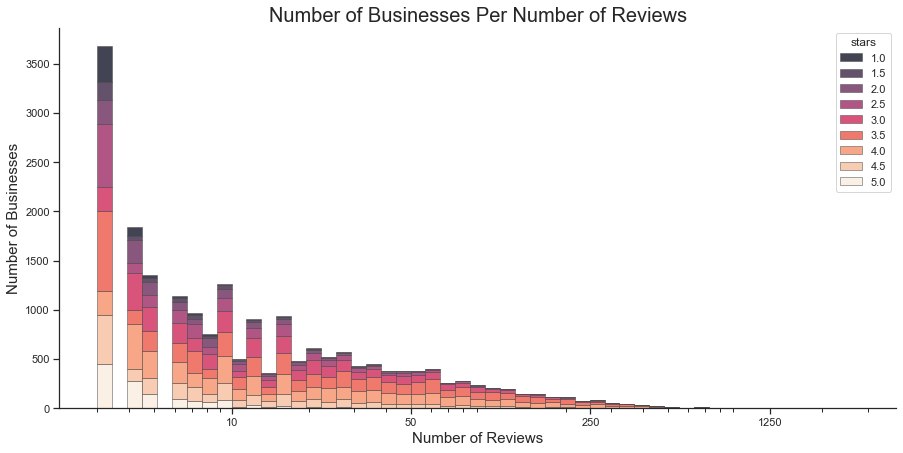

In [7]:
# distribution of the number of reviews per business, sorted by stars
sns.set_theme(style = "ticks")
f, ax = plt.subplots(figsize=(15, 7))
sns.despine(f)
sns.histplot(
    yelp_tor,
    # the colours change based on the number of stars a business has for a given number of reviews
    x = "review_count", hue="stars",
    multiple = "stack",
    # I like this palette from seaborn, vibrant yet distinct, easy to read 
    palette = "rocket",
    edgecolor = ".3",
    linewidth = .5,
    # using a logarithmic scale for the x axis since that is how review count is likely distributed
    log_scale = True)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_title("Number of Businesses Per Number of Reviews", fontsize = 20)
ax.set_xlabel("Number of Reviews", fontsize = 15)
ax.set_ylabel("Number of Businesses", fontsize = 15)
# custom x-axis labels for clarity
ax.set_xticks([10, 50, 250, 1250]);

As expected, the majority of businesses in Toronto have been reviewed no more than 10 times on Yelp (left side of the plot). As I move along the right tail of the distribution, I notice that fewer and fewer businesses receive more and more review counts. The x-axis of the curve has been scaled logarithmically as a result. This curve is somewhat reminscent of a Pareto distribution, which reflects the Pareto or 80/20 principle. Intuitively, it is not unreasonable to suggest that ~80% of the businesses on Yelp receive ~20% of the reviews

## Figure 2: Distribution of the Number of Stars (Histogram)

Since I have thoroughly looked at the distributions of both x variables (location and number of reviews), it may be helpful to look at the distribution of star ratings for Toronto businesses. Since I have even bin sizes and no outliers (stars range from 1-5 in increments of 0.5), I can create a histogram below.

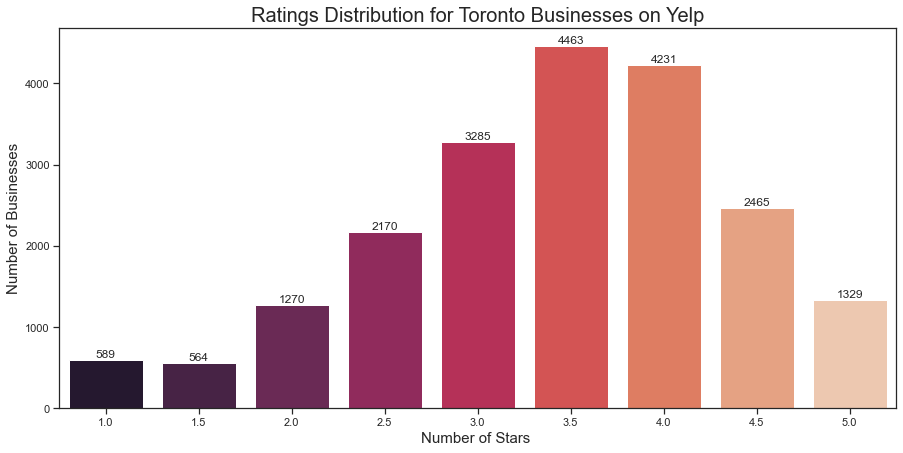

In [8]:
# Ratings distribution of Toronto Businesses on Yelp
tor = yelp_tor['stars'].value_counts()
tor = tor.sort_index()

#plot
plt.figure(figsize=(15, 7))
# same palette as before
ax= sns.barplot(x = tor.index, y = tor.values, palette = "rocket")
plt.title("Ratings Distribution for Toronto Businesses on Yelp", fontsize = 20)
plt.ylabel('Number of Businesses', fontsize=15)
plt.xlabel('Number of Stars ', fontsize=15)

#adding the text labels
rects = ax.patches
labels = tor.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()

The distribution of the histogram reflects what the summary statistics had already alluded to previously. The most common rating for a business in Toronto is 3.5 stars, followed by 4 stars and 3 stars.

## Figure 3: Number of Reviews vs. Number of Stars (Boxplots)

Having looked at each variable independent of one another, I can examine whether any relationship between the explanatory variables (location and number of reviews) and the response variable (number of stars) exists. First, I create several boxplots which examine Toronto businesses in the Yelp dataset based on the number of reviews and the number of stars it receives on Yelp.

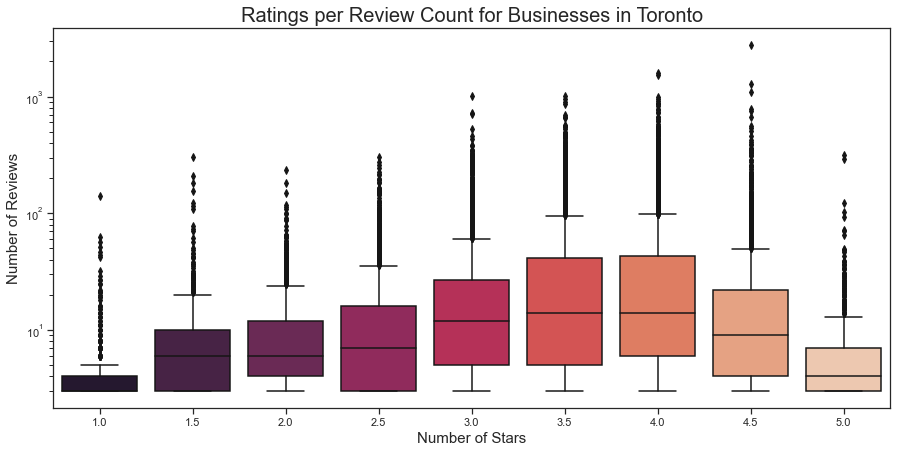

In [9]:
# Star Ratings Based on Number of Reviews for Toronto Businesses on Yelp
#plot
plt.figure(figsize=(15, 7))
ax = sns.boxplot(x = yelp_tor.stars, y = yelp_tor.review_count, palette = "rocket")
plt.title("Ratings per Review Count for Businesses in Toronto", fontsize = 20)
plt.yscale("log")
plt.ylabel('Number of Reviews', fontsize = 15)
plt.xlabel('Number of Stars', fontsize = 15)

plt.show()

Based on the plot above, there are a few observations that can be made. Firstly, the businesses that have the least number of reviews have either the highest rating (5 stars), or the lowest three ratings (1, 1.5, and 2 stars). There may be several reasons for this phenomenon, one being that it may be difficult for a business with many reviews to maintain a sky high rating. On the flip side, customers may be dissuaded from visiting a business with a super low rating already, and therefore be less likely to review the business.

The plot also shows that while the maximum (Q3 + 1.5 * IQR) number of reviews for a business in Toronto for all star levels is ~100 or less for each star rating, every star rating has several dozen outliers. This reaffirms the pareto notion described earlier, which suggests that the majority of customer reviews are granted to a small minority (outliers) of businesses, regardless of the rating they are given.

## Figure 4: Location vs. Number of Stars (Scatter Map)

In order to assess whether location plays any role in business ratings, I generate a "map" of toronto by creating a scatterplot of businesses on Yelp. Since latitude as an angle measures a locations' North-South position on Earth, and longitude as an angle measures a locations' East-West position on Earth, these variables are plotted as the y and x variables respectively below. As for the number of stars a business has on Yelp, ratings have been colour coordinated according to the legend on the left.

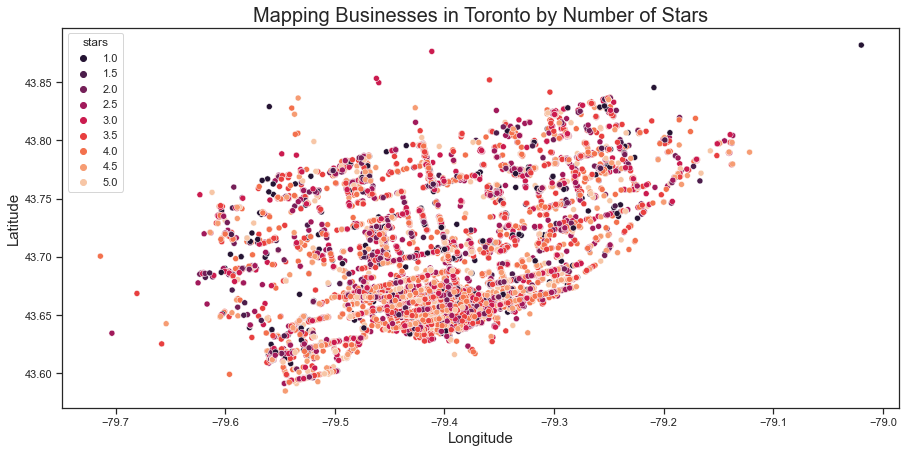

In [10]:
# Star Ratings Based on Number of Reviews for Toronto Businesses on Yelp
# same palette as before, 9 colours for 9 star categories
palette = sns.color_palette("rocket", 9)
plt.figure(figsize=(15, 7))
# scatterplot will form a shape of Toronto
ax = sns.scatterplot(x = yelp_tor.longitude, y = yelp_tor.latitude, palette = palette, hue = yelp_tor.stars)
plt.title("Mapping Businesses in Toronto by Number of Stars", fontsize = 20)
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Longitude', fontsize=15)
new_title = "Number of Stars"

plt.show()

## Figure 5: Location vs. Number of Stars (Scatter Map Subplots)

Having plotted all of the businesses from the dataset above, I see a general shape of Toronto forming, with the curvature of the waterfront at the bottom, and several straighlines of points resembling the city's gridlike nature. However, since there are so many datapoints, it might be easier to generate 9 different maps, one for each rating (from 1 star to 5 star). In the 3x3 grid below, ratings have been sorted from 1 star in the top left to 5 star in the bottom right.

Text(0.5, 1.0, '5 Star Businesses')

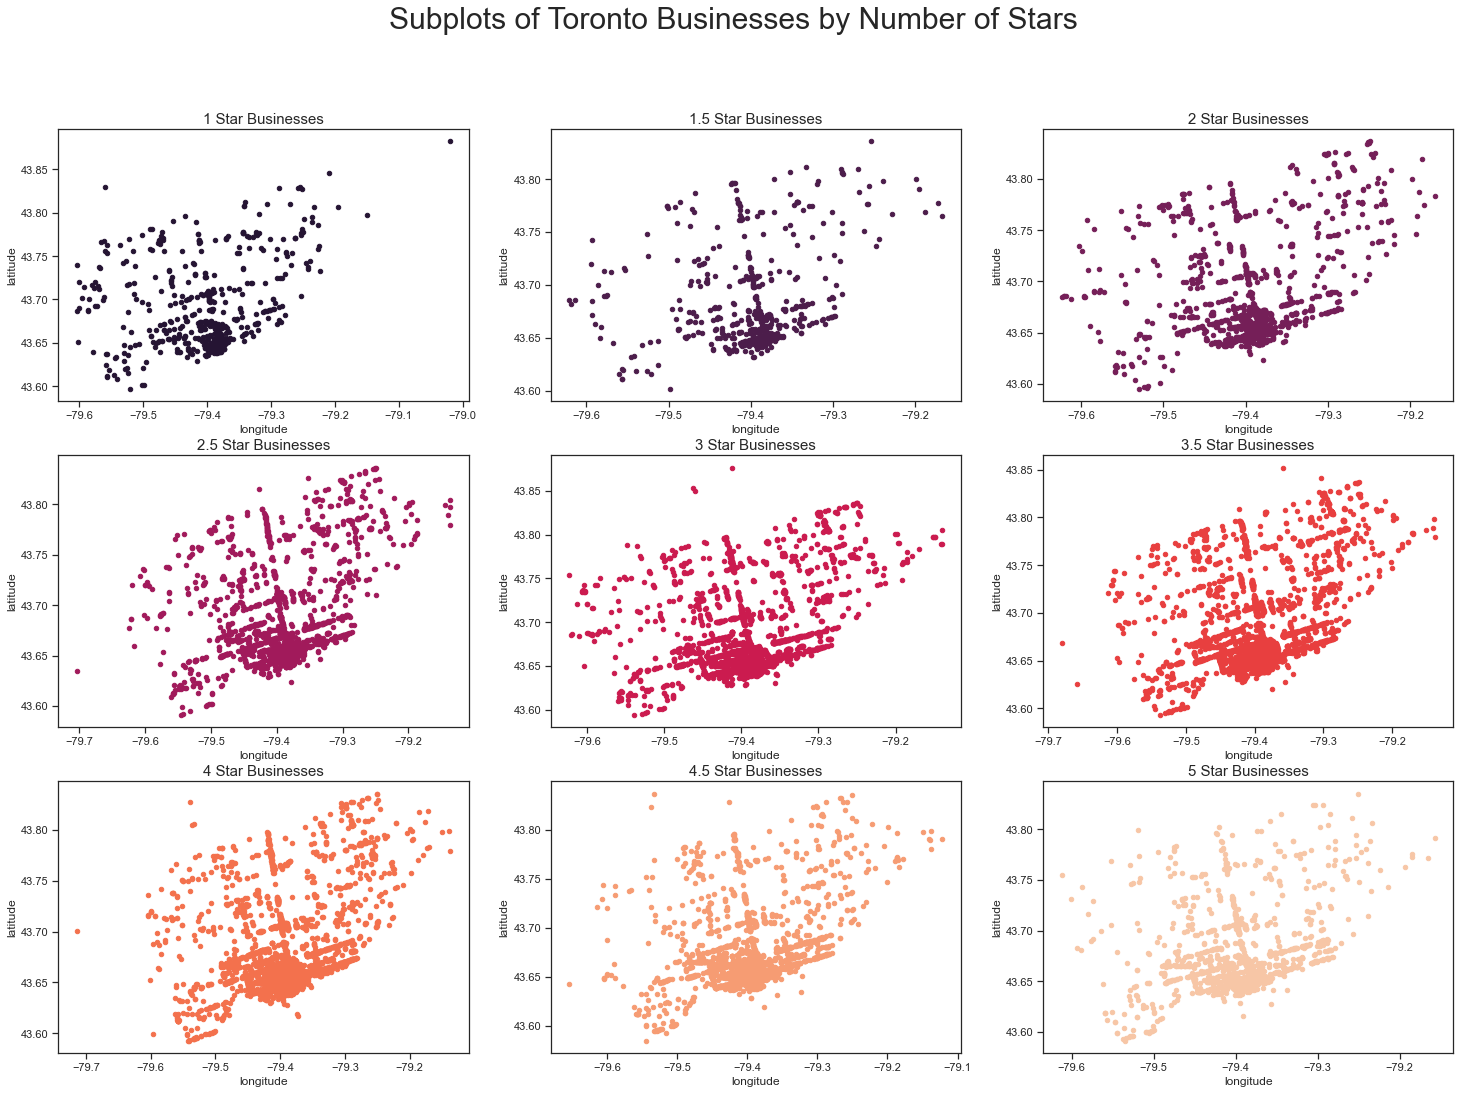

In [11]:
# same palette as before
palette = itertools.cycle(sns.color_palette("rocket", 9))
# 3x3 plot since there are 9 star categories (from 1 to 5 stars)
plots, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]] = plt.subplots(3, 3, figsize = (25, 17))

plots.suptitle("Subplots of Toronto Businesses by Number of Stars", fontsize = 30)

# 1 star businesses (same idea for the rest of the code chunks)
yelp_tor1 = yelp_tor["stars"].isin(["1.0"])
yelp_tor1 = yelp_tor[yelp_tor1]
yelp_tor1.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax1)
ax1.set_title("1 Star Businesses", fontsize = 15)

yelp_tor15= yelp_tor["stars"].isin(["1.5"])
yelp_tor15 = yelp_tor[yelp_tor15]
yelp_tor15.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax2)
ax2.set_title("1.5 Star Businesses", fontsize = 15)

yelp_tor2= yelp_tor["stars"].isin(["2.0"])
yelp_tor2 = yelp_tor[yelp_tor2]
yelp_tor2.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax3)
ax3.set_title("2 Star Businesses", fontsize = 15)

yelp_tor25= yelp_tor["stars"].isin(["2.5"])
yelp_tor25 = yelp_tor[yelp_tor25]
yelp_tor25.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax4)
ax4.set_title("2.5 Star Businesses", fontsize = 15)

yelp_tor3= yelp_tor["stars"].isin(["3.0"])
yelp_tor3 = yelp_tor[yelp_tor3]
yelp_tor3.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax5)
ax5.set_title("3 Star Businesses", fontsize = 15)

yelp_tor35= yelp_tor["stars"].isin(["3.5"])
yelp_tor35 = yelp_tor[yelp_tor35]
yelp_tor35.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax6)
ax6.set_title("3.5 Star Businesses", fontsize = 15)

yelp_tor4= yelp_tor["stars"].isin(["4.0"])
yelp_tor4 = yelp_tor[yelp_tor4]
yelp_tor4.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax7)
ax7.set_title("4 Star Businesses", fontsize = 15)

yelp_tor45= yelp_tor["stars"].isin(["4.5"])
yelp_tor45 = yelp_tor[yelp_tor45]
yelp_tor45.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax8)
ax8.set_title("4.5 Star Businesses", fontsize = 15)

yelp_tor5= yelp_tor["stars"].isin(["5.0"])
yelp_tor5 = yelp_tor[yelp_tor5]
yelp_tor5.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax9)
ax9.set_title("5 Star Businesses", fontsize = 15)

The 3x3 grid of maps above showcases the density of businesses in the downtown area of Toronto (the cluster around -79.4 degrees of longitude and 43.65 degrees of latitude). One observation that can be made is that there are very few 1 star rated businesses in the eastern half of Toronto (blue scatter). Another observation is that it seems as though many lower rated businesses exist in the western half of Toronto (see the points between -79.7 and -79.6 degrees of longitude for every scatter).

# Part Two

## The Message
Whereas the first iteration of this project provided a rough estimation as how the number of stars a business has on Yelp relates to the number of reviews it has and its location (longitude and latitude), the second iteration will look to provide a more in-depth analysis in two ways. 

The first way is to add a backdrop of the various neighbourhoods/wards of the city of Toronto. In the case of Figure 4 and Figure 5, adding a map backdrop will make it easier to interpret where individual businesses lie relative to one another. The second way is to generate an interactive map where all variable information is present. That is, a map that labels businesses by name, number of stars, number of reviews, and location. A rough draft combining these two ideas as one has been drawn below (Figure 6).

## Figure 6: Drafted Visualization (Interactive Map)

The image below depicts a rough idea of what I want my final findings to reflect. The plot should depict a coloured map of Toronto with borders for every neighbourhood/ward. The colour of these wards can reflect a number of things, but for now should reflect the number of businesses within that neighbourhood that have been reviewed by Yelp (almost like a heat map). The plot should also be interactive in that when I place a cursor over a neighbourhood, I should be able to see its name, the average (or maybe total) number of reviews its businesses have, and the average rating a business has in its vicinity. These are prelimiary variables however, as merging this project with another dataset (e.g. neighbourhood income, crime indices, etc.) may lead to more fruitful findings. As for the axes, since the plot is a map, it should have longitude as the x-axis and latitude as the y-axis.

![](toronto_draft_graph.png)

# Part Three

Because I did not include a map in part one comparing location to number of reviews, the following set of 3x3 subplots has been made below (similar to Figure 5). Each subplot categorizes businesses in Toronto based on a range of number of reviews on Yelp (e.g. Between 3 and 10, 11 and 25, 26 and 50, etc.)

## Figure 7: Location vs. Number of Reviews (Scatter Map Subplots)

Text(0.5, 1.0, 'More Than 1000 Reviews')

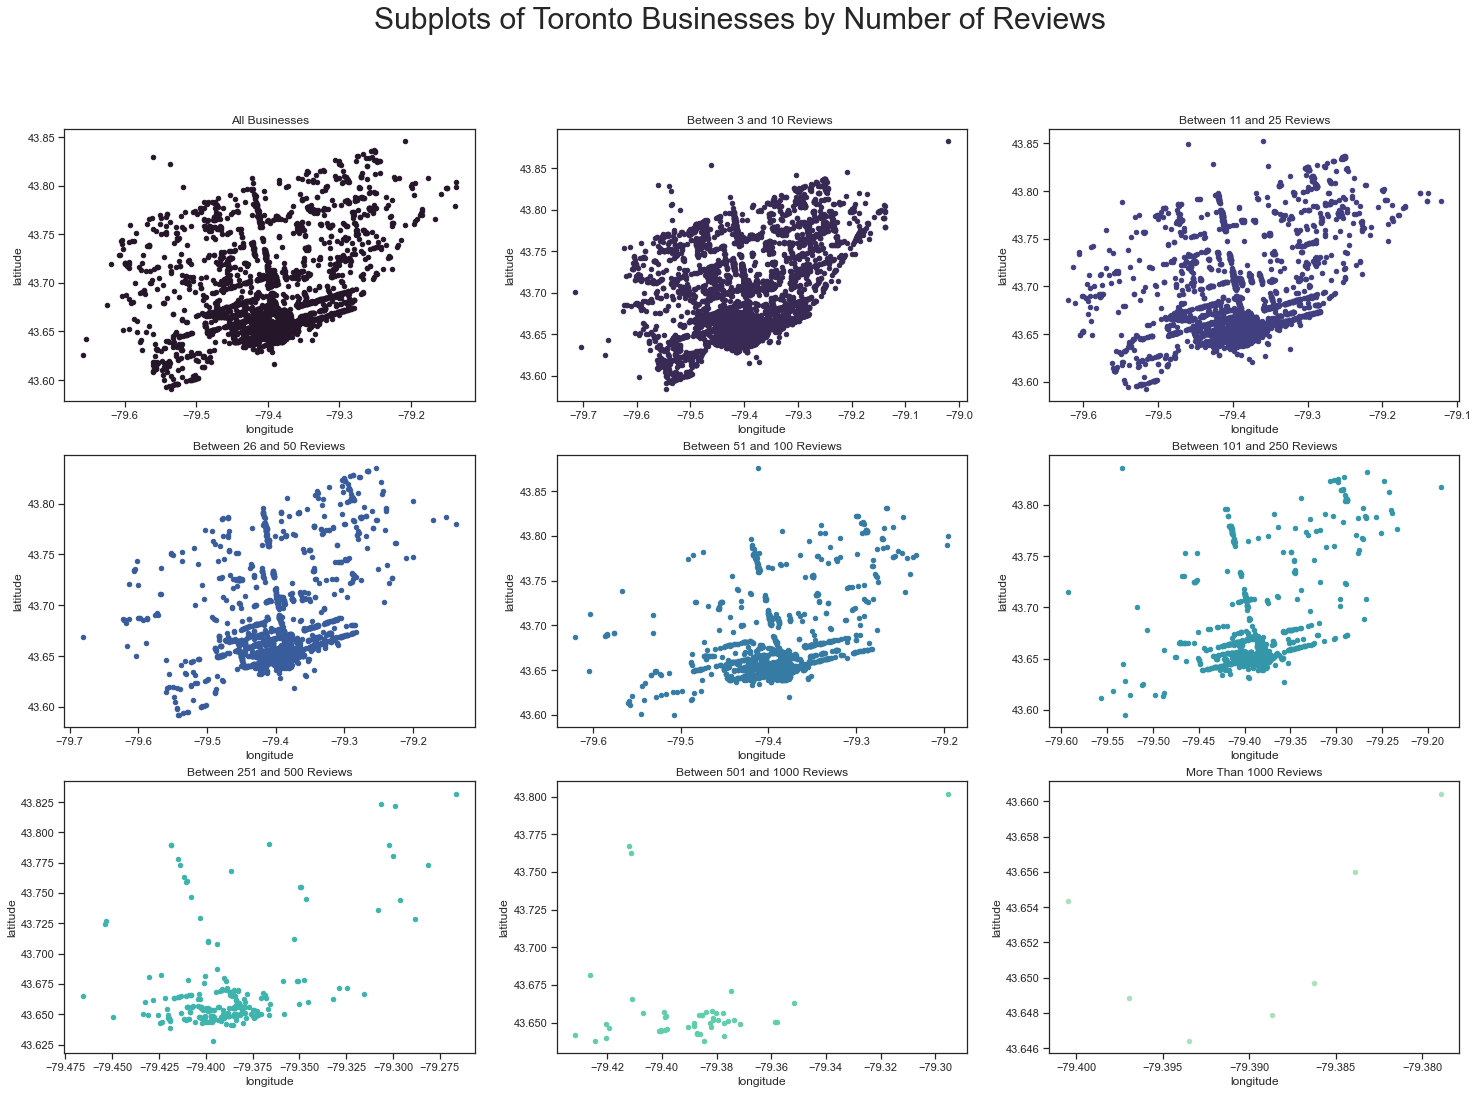

In [12]:
# using a different color palette since the number of stars a business has is not discussed
palette = itertools.cycle(sns.color_palette("mako", 9))
# 3x3 subplots look nice and the stratification of the number of reviews works well
plots, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]] = plt.subplots(3, 3, figsize = (25, 17))

plots.suptitle("Subplots of Toronto Businesses by Number of Reviews", fontsize = 30)

# all businesses in the dataset have a minimum of 3 Yelp reviews
yelp_tor1 = yelp_tor["review_count"] <= 3
yelp_tor1 = yelp_tor[yelp_tor1]
yelp_tor1.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax1)
ax1.set_title("All Businesses")

# businesses between 3 and 10 reviews (same idea for the rest of the code chunks)
yelp_tor15= yelp_tor[(yelp_tor["review_count"] >= 3) & (yelp_tor["review_count"] <= 10)]
yelp_tor15.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax2)
ax2.set_title("Between 3 and 10 Reviews ")

yelp_tor2= yelp_tor[(yelp_tor["review_count"] > 10) & (yelp_tor["review_count"] <= 25)]
yelp_tor2.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax3)
ax3.set_title("Between 11 and 25 Reviews")

yelp_tor25= yelp_tor[(yelp_tor["review_count"] > 25) & (yelp_tor["review_count"] <= 50)]
yelp_tor25.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax4)
ax4.set_title("Between 26 and 50 Reviews")

yelp_tor3= yelp_tor[(yelp_tor["review_count"] > 50) & (yelp_tor["review_count"] <= 100)]
yelp_tor3.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax5)
ax5.set_title("Between 51 and 100 Reviews")

yelp_tor35= yelp_tor[(yelp_tor["review_count"] > 100) & (yelp_tor["review_count"] <= 250)]
yelp_tor35.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax6)
ax6.set_title("Between 101 and 250 Reviews")

yelp_tor4= yelp_tor[(yelp_tor["review_count"] > 250) & (yelp_tor["review_count"] <= 500)]
yelp_tor4.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax7)
ax7.set_title("Between 251 and 500 Reviews")

yelp_tor45= yelp_tor[(yelp_tor["review_count"] > 500) & (yelp_tor["review_count"] <= 1000)]
yelp_tor45.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax8)
ax8.set_title("Between 501 and 1000 Reviews")

yelp_tor5= yelp_tor["review_count"] > 1000
yelp_tor5 = yelp_tor[yelp_tor5]
yelp_tor5.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax9)
ax9.set_title("More Than 1000 Reviews")

While Figure 7 look clean and provide some clarity as to how location is related to the number of reviews a Toronto business receives on Yelp, this set of plots has obvious limitations. In particular, the bottom row does not have enough datapoints to artifically generate an overall shape of Toronto, thereby making it more difficult to determine where a business' location is (e.g. it is very difficult to know where any of the businesses shown in the bottom right plot are located in Toronto.

## Figure 8: Location (By Neighbourhood) vs. Number of Stars (Scatter Map)

One way of resolving the issues of Figure 7 is to generate a map of Toronto and its neighbourhoods, and set it as a backdrop upon which each individual business (the scatterpoints from above) can be shown. To do this, I import two datasets containing neighbourhood data from the Open Toronto Data Portal (bonus #1?).

The dataset loaded directly below contains text data for every neighbourhood in Toronto (ID and name). This data is merged with a geojson dataset which is used to generate the borders of the various neighbourhoods. 

Since I already have a map from part one with all Toronto businesses sorted by number of stars (Figure 4), I can superimpose those data points onto a map of Toronto and its neighbourhoods to create a more detailed graph.

In [13]:
# import Toronto neighbourhood info
toronto_df = pd.read_csv("toronto_neighbourhoods.csv")

toronto_df.head()

Neighbourhood ID            Neighbourhood Name
0               129               Agincourt North
1               128  Agincourt South-Malvern West
2                20                     Alderwood
3                95                         Annex
4                42             Banbury-Don Mills

In [14]:
toronto_gdf = gpd.read_file("Neighbourhoods.geojson")
# Slice dataframe for only relevant attributes
toronto_gdf = toronto_gdf.iloc[:, 5:] 
# Rename Area_Long_Code as it is same as Neighbourhood ID
toronto_gdf.rename(columns={'AREA_LONG_CODE': 'Neighbourhood ID'},
                   inplace=True)  
# remove unneccessary columns from the dataframe
toronto_gdf.drop(labels=['AREA_DESC', 'OBJECTID', 'X', 'Y', 'AREA_NAME', 'LONGITUDE', 'LATITUDE', 
                         'CLASSIFICATION', 'CLASSIFICATION_CODE'],
                 axis = 1, inplace = True) 
toronto_gdf=toronto_gdf.merge(toronto_df, on ='Neighbourhood ID') 
# Convert column names to a List
cols = toronto_gdf.columns.tolist() 
# Move last column to first column
cols = cols[-1:] + cols[:-1] 
# Reorder the columns in the Geopandas dataframe
toronto_gdf=toronto_gdf[cols] 

toronto_gdf.head() 

Neighbourhood Name  Neighbourhood ID   Shape__Area  Shape__Length  \
0            Casa Loma                96  3.678385e+06    8214.176485   
1                Annex                95  5.337192e+06   10513.883143   
2   Caledonia-Fairbank               109  2.955857e+06    6849.911724   
3    Woodbine Corridor                64  3.052518e+06    7512.966773   
4  Lawrence Park South               103  6.211341e+06   13530.370002   

                                            geometry  
0  POLYGON ((-79.41469 43.67391, -79.41485 43.674...  
1  POLYGON ((-79.39414 43.66872, -79.39588 43.668...  
2  POLYGON ((-79.46021 43.68156, -79.46044 43.681...  
3  POLYGON ((-79.31485 43.66674, -79.31660 43.666...  
4  POLYGON ((-79.41096 43.70408, -79.41165 43.703...

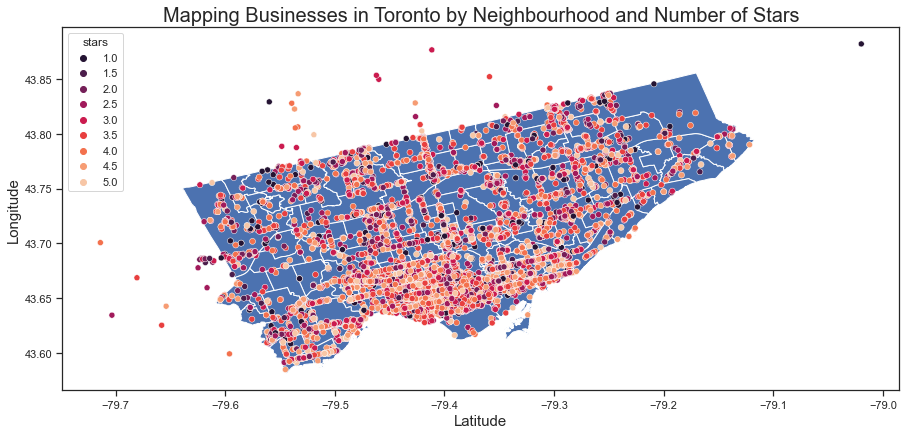

In [15]:
# Star Ratings Based on Number of Reviews for Toronto Businesses on Yelp
# same palette as before, 9 colours for 9 star categories
palette = sns.color_palette("rocket", 9)

toronto_gdf.plot(figsize = (15, 7))
plt.title("Mapping Businesses in Toronto by Neighbourhood and Number of Stars", fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Longitude", fontsize = 15)
# scatterplot will form a shape of Toronto
ax = sns.scatterplot(x = yelp_tor.longitude, y = yelp_tor.latitude, palette = palette, hue = yelp_tor.stars)


plt.show()

Clearly, there are some issues with the plot above. For starters, some of the businesses in the Yelp dataset are for businesses located outside of the official neighbourhoods of Toronto. While this does not affect any of the findings in this notebook, the plot is unpleasant to read and difficult to interpret (many borders between neighbourhoods are covered up by datapoints). Furthermore, Figure 8 is limited in the sense that individual business information cannot be identified. While a still image of a map can be useful for identifying the general location and distribution of businesses, neither of those aspects improve upon what has already been shown by other figures in the notebook thus far.

## Figure 9: Location vs. Number of Stars and Number of Reviews (Interactive Map)

The only way to significantly improve upon the plots in this notebook is to generate an interactive map. With the help of  plotly, I have created an interactive map of Toronto with the following features. Of note, the number of stars a business possesses is denoted by the colour of its marker and the number of stars a business has is denoted by the size of its marker. Furthermore, highlighting over a business shows its longitude, latitude, and name. By zooming into a particular area of the map, one can also identify the name of the neighbourhood they are looking at. 

In [16]:
fig = px.scatter_mapbox(yelp_tor, lat="latitude", lon="longitude", color="stars", size="review_count",
                        text = "name", color_continuous_scale = px.colors.sequential.Magma, size_max=15, 
                        zoom=10, mapbox_style = "carto-positron", 
                        title = "Mapping Toronto Businesses by Number of Stars and Number of Reviews")

fig.show()

Figure 9 is able to cleanly plot and describe all of the variables of interest in this project (that is, names of busineses, number of reviews, number of stars, and location). As for interpreting the findings of Figure 9, the western part of the downtown core of Toronto is unsurprisingly the most frequented area for Yelp reviewees (as confirmed by Figure 7). In particular, streets like Queen St. West, Spadina Ave., and Bloor St. West are densely populated with popular businesses (larger bubbles). As for businesses with higher star ratings (lighter coloured bubbles), the distribution remains relatively balanced (as evidenced by Figure 5). Although this map does not necessarily confirm any new patterns or relationships between location, number of reviews, and number of stars, it does provide an easier way to interpret the variables on their own (and in conjunction with one another). 

## Conclusion

In this notebook, data from Yelp was taken from Kaggle to answer the following research question: In Toronto, does the location and number of reviews of a business on Yelp influence the number of stars it receives from users? Part one of this project focused on importing, cleaning, sorting, summarizing, plotting, and analyzing data for business reviewed on Yelp in Toronto. 
Part two of this notebook reaffirmed the message or research question of this notebook, and included a rough draft of a Figure 9 from part three. Part three featured three new plots. The first was a 3x3 set of subplots which compares business locations to the number of reviews they have on Yelp. The second was a combination of Figure 4 and a map of the various communities of Toronto. The third was a map which plots all of the variables of notes in an interactive manner.  

Future work on this notebook will look to address some of the limitations of the findings in parts 1, 2, and 3. Some of these changes may include more interactive plots (as opposed to static plots), more statistical analysis comparing the explanatory variables to the response variable, and greater stratfication between communities. In particular, Figure 9 may provide some interesting results when merged with other geographic or economic data (e.g. community/ward borders, demographics related to income/crime/poverty, etc.). 

As a resource for other programmers, this notebook can be used to springboard further analysis on businesses not only in Toronto, but other locations as well. Furthermore, users of this notebook can be used to incorporate other variables from the Yelp dataset itself (e.g. looking at specific types of businesses, hours of operation, etc.).